In [2]:
# Ebnable HTML/CSS 
from IPython.core.display import HTML
HTML("<link href='https://fonts.googleapis.com/css?family=Passion+One' rel='stylesheet' type='text/css'><style>div.attn { font-family: 'Helvetica Neue'; font-size: 30px; line-height: 40px; color: #FFFFFF; text-align: center; margin: 30px 0; border-width: 10px 0; border-style: solid; border-color: #5AAAAA; padding: 30px 0; background-color: #DDDDFF; }hr { border: 0; background-color: #ffffff; border-top: 1px solid black; }hr.major { border-top: 10px solid #5AAA5A; }hr.minor { border: none; background-color: #ffffff; border-top: 5px dotted #CC3333; }div.bubble { width: 65%; padding: 20px; background: #DDDDDD; border-radius: 15px; margin: 0 auto; font-style: italic; color: #f00; }em { color: #AAA; }div.c1{visibility:hidden;margin:0;height:0;}div.note{color:red;}</style>")

## Lab Assignment Six: Wide and Deep Network

________________________________________________________________________________________________________
* Name1: Simin Wang
* Name2: Yibo Tang
* Name3: Jingzhen Hu

## Contents
* <a href="#PO">1. Preparation</a>
 * 1.1 Business Understanding
 * 1.2 Data Understanding and Pre-processing
 * 1.3 Feature Grouping
 * 1.4 Metric Selection
 * 1.5 Data Splitting
 
 
* <a href="#Modeling">2. Modeling</a>
 * 2.1 Wide and Deep Network
 * 2.2 Comparison of Different Deep Network
 * 2.3 Comparison of Best Deep Network and MLP


* <a href="#ExceptionalWork">3. Exceptional Work</a>
 
 
* <a href="#References">References</a>
<a id="Loading"></a>

<a id="PO"></a>
## 1. Preparation

### 1.1 Business Understanding

We decide to reuse the Wine Quality Dataset from lab1 that is downloaded from professor Cortez at University of Minho (retrieve at http://www3.dsi.uminho.pt/pcortez/wine/), which consists of 6,497 instances and 14 features (excluding case number). There are 3 categorical features and 11 numeric features. The 'quality' is the class variable. 

This dataset stores a set of Vinho Verde samples, a type of wine originated from the Minho (northwest) region of Portugal. The Vinho Verdes are light and fresh. The samples contain two types, white wine and red wine. The white Vinho Verde is very fresh, due to its natural acidity, with fruity and floral aromas that depend on the grape variety, around 8.5 to 11% alcohol. The red Vinho Verde wines are an intense red color, and in the mouth it is fresh and intense.

Wine selling is always a great business around the world, and Portugal is a top ten wine exporting country, among which Vinho Verde is one of the best-selling products. Quality assessment is a key element within this context. Actually, the quality of Vinho Verde wines varies according to the different ratios of physicochemical properties, and is generally assessed by physicochemical and sensory tests, which rely mainly on human experts. Hence, in our dataset, quality has been divided into 7 levels (from lowest 3 to highest 9). 

Therefore, our primary goal is to provide quality prediction service for the wine companies, especially selling Vinho Verde wines, which should be more instant, cheaper and hopefully more accurate when comparing with manual efforts. Specifically, by logistic regression, we want to automatically and precisely classify products (wine) with 14 physicochemical properties into three general quality categories: Low, Medium, and High, since detailed separation from 3 to 9 might not be quite useful for targeting customers. Those three categories could easily guide company to conduct the strategy and narrow down the scope to three corresponding groups: the upper class, the ordinary people and the poor, thus pricing wines accordingly. 

How to map numeric quality level to three categories is our next concern. Slicely different separation from lab4, considering the populations in each group and class distributions in our dataset, high quality wines and low quality wines should constitute a small part so that 3-5 belongs to Low and 7-9 represents High. Most ordinary people could afford modest price, and level 6 is included in Medium, which is the biggest amount. Anyway, we could have further discussions about mapping problems with cooperated companies in the future.

Finally, we have to determine how well our methodology is considered to be applicable. Since three categories are needed right now, it’s necessary to expect overall high f1_score, at least 70% and attempt to reach over 80%. If less than 70%, company would suffer a great risk of increasing budgets due to the misclassification, such as returning products from customers who should have a better quality, thus increasing the probability of losing customers and reputation. 

### 1.2 Data Understanding and Pre-processing

In [3]:
# input the wine data set
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings("ignore")

df = pd.read_csv('wine.csv')
# rename the feature, which is more meaningful: whether contains citric or not
df = df.rename(columns = {'citric': 'cont_citric'})
# display the top 5 instances
df.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,wine_type,cont_citric,density_water,quality
0,5.6,0.25,0.19,2.4,0.049,42.0,166.0,0.99200,3.25,0.43,10.400000,white,1,0,6
1,7.2,0.24,0.30,1.2,0.037,11.0,95.0,0.98914,2.96,0.36,12.500000,white,1,0,6
2,6.0,0.31,0.38,4.8,0.040,41.0,101.0,0.98968,3.24,0.56,13.100000,white,1,0,6
3,6.0,0.29,0.41,10.8,0.048,55.0,149.0,0.99370,3.09,0.59,10.966667,white,1,0,7
4,6.2,0.15,0.49,0.9,0.033,17.0,51.0,0.99320,3.30,0.70,9.400000,white,1,0,6


In [4]:
#Combine quality level 7-9 as 'High' quality
df.quality.replace(to_replace=[7,8,9],
               value= 'High',
               inplace=True)

#Combine quality level 6 as 'Medium' quality
df.quality.replace(to_replace=6,
               value= 'Medium',
               inplace=True)

#Combine quality level 3-5 as 'Low' quality
df.quality.replace(to_replace=[3,4,5],
               value= 'Low',
               inplace=True)

df.quality = df.quality.astype('str')
df.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,wine_type,cont_citric,density_water,quality
0,5.6,0.25,0.19,2.4,0.049,42.0,166.0,0.99200,3.25,0.43,10.400000,white,1,0,Medium
1,7.2,0.24,0.30,1.2,0.037,11.0,95.0,0.98914,2.96,0.36,12.500000,white,1,0,Medium
2,6.0,0.31,0.38,4.8,0.040,41.0,101.0,0.98968,3.24,0.56,13.100000,white,1,0,Medium
3,6.0,0.29,0.41,10.8,0.048,55.0,149.0,0.99370,3.09,0.59,10.966667,white,1,0,High
4,6.2,0.15,0.49,0.9,0.033,17.0,51.0,0.99320,3.30,0.70,9.400000,white,1,0,Medium


According to the Wine Folley, an educational wine blog that publishes articles, videos, and infographics to help simplify wine (http://winefolly.com/tutorial/the-lightest-to-the-strongest-wine/), we change the 'alcohol' from numeric feature to categorical feature by classifying our wine products into 4 categories: From the Lightest to the Strongest
- Low Alcohol Wines: Below 10%
- Medium-Low Alcohol Wines: 10%–11.5%
- Medium Alcohol Wines: 11.5%–13.5%
- Medium-High Alcohol Wines: 13.5%–15%

In [5]:
#Low Alcohol Wines: Below 10%, label as 0
df.alcohol.replace(to_replace=df[df.alcohol.values < 10].alcohol.values,
               value= 0,
               inplace=True)

#Medium-Low Alcohol Wines: 10%–11.5%, label as 1
df.alcohol.replace(to_replace=df[(df.alcohol.values >= 10) & (df.alcohol.values < 11.5)].alcohol.values,
               value= 1,
               inplace=True)

#Medium Alcohol Wines: 11.5%–13.5%, label as 2
df.alcohol.replace(to_replace=df[(df.alcohol.values >= 11.5) & (df.alcohol.values < 13.5)].alcohol.values,
               value= 2,
               inplace=True)

#Medium-High Alcohol Wines: 13.5%–15%, label as 3
df.alcohol.replace(to_replace=df[(df.alcohol.values >= 13.5) & (df.alcohol.values < 15)].alcohol.values,
               value= 3,
               inplace=True)

df.alcohol = df.alcohol.astype('int')

df.alcohol.replace(to_replace = 0,
               value= 'Low',
               inplace=True)

df.alcohol.replace(to_replace = 1,
               value= 'Medium-Low',
               inplace=True)

df.alcohol.replace(to_replace = 2,
               value= 'Medium',
               inplace=True)

df.alcohol.replace(to_replace = 3,
               value= 'Medium-High',
               inplace=True)

df.alcohol = df.alcohol.astype('str')
df.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,wine_type,cont_citric,density_water,quality
0,5.6,0.25,0.19,2.4,0.049,42.0,166.0,0.99200,3.25,0.43,Medium-Low,white,1,0,Medium
1,7.2,0.24,0.30,1.2,0.037,11.0,95.0,0.98914,2.96,0.36,Medium,white,1,0,Medium
2,6.0,0.31,0.38,4.8,0.040,41.0,101.0,0.98968,3.24,0.56,Medium,white,1,0,Medium
3,6.0,0.29,0.41,10.8,0.048,55.0,149.0,0.99370,3.09,0.59,Medium-Low,white,1,0,High
4,6.2,0.15,0.49,0.9,0.033,17.0,51.0,0.99320,3.30,0.70,Low,white,1,0,Medium


In [6]:
df.cont_citric.replace(to_replace = 1,
               value= 'Y',
               inplace=True)

df.cont_citric.replace(to_replace = 0,
               value= 'N',
               inplace=True)

df.density_water.replace(to_replace = 1,
               value= 'Y',
               inplace=True)

df.density_water.replace(to_replace = 0,
               value= 'N',
               inplace=True)

df.cont_citric = df.cont_citric.astype('str')
df.density_water = df.density_water.astype('str')

df.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,wine_type,cont_citric,density_water,quality
0,5.6,0.25,0.19,2.4,0.049,42.0,166.0,0.99200,3.25,0.43,Medium-Low,white,Y,N,Medium
1,7.2,0.24,0.30,1.2,0.037,11.0,95.0,0.98914,2.96,0.36,Medium,white,Y,N,Medium
2,6.0,0.31,0.38,4.8,0.040,41.0,101.0,0.98968,3.24,0.56,Medium,white,Y,N,Medium
3,6.0,0.29,0.41,10.8,0.048,55.0,149.0,0.99370,3.09,0.59,Medium-Low,white,Y,N,High
4,6.2,0.15,0.49,0.9,0.033,17.0,51.0,0.99320,3.30,0.70,Low,white,Y,N,Medium


The data is organized as follows: 

|Variable | description|
|----|--------|
|fixed_acidity:    | continuous, 3.80 - 15.90|
|volatile_acidity: | continuous, 0.08 - 1.58|
|citric_acid:      | continuous, 0.00 - 1.66|
|residual_sugar:   | continuous, 0.60 - 65.80|
|chlorides:        | continuous, 0.09 - 0.61|
|free_sulfur_dioxide:  | continuous, 1.00 - 289.00|
|total_sulfur_dioxide: | continuous, 6.00 - 440.00|
|density:          | continuous, 0.99 - 1.04|
|pH:               | continuous, 2.72 - 4.01|
|sulphates:        | continuous, 0.22 - 2.00|
|alcohol:          | Low, Medium-Low, Medium, Medium-High.|
|wine_type:        | White, Red.|
|cont_citric:      | Y: contain critic, N: not contain critic.|
|density_water:    | Y: density > water, N: density < water.|


### 1.3 Feature Grouping

Totally we have 4 categorical features, 'alcohol','wine_type','cont_citric','density_water'. In terms of cross features, wine_type is definitely our top choice since relations between red or white wine and other categorical features could have a great impact on quality prediction. Different wines have varying levels of alcohol content, so we first want to combine the wine_type with alcohol, thus exploring whether the specific wine_type with the specific level of alcohol content could improve the prediction result. To further improve the model, we'd attempt to combine the wine_type with other two categorical features as well, to see if various wine_types with certain level of density and citric acid have a great influence or not.

In [7]:
categorical_headers = ['alcohol','wine_type','cont_citric','density_water']

numeric_headers = ["fixed_acidity", "volatile_acidity","citric_acid",
                           "residual_sugar","chlorides","free_sulfur_dioxide",
                           "total_sulfur_dioxide","density","pH","sulphates"]

cross_columns = [['wine_type','alcohol'], ['wine_type','cont_citric'], 
                     ['wine_type', 'density_water']]

### 1.4 Metric Selection

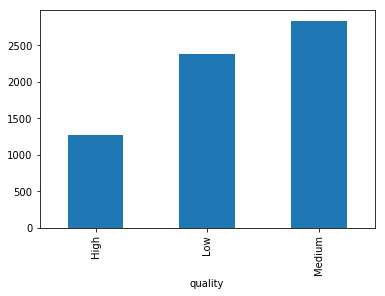

In [8]:
from matplotlib import pyplot as plt
%matplotlib inline

df.groupby(['quality']).quality.count().plot(kind = 'bar')

Since the number of different type of flaut are extremely imbalanced (which show in the histogram plot above), we should not use the normal accuracy as evaluation metric (the cost of misclassification for the small sized target class will be overlooked). F1 score considers both the precision and recall. As the higher precision, the lower false positive. As the higher the recall, the lower the false negative. Then, to minimize the both the false postive and false negative, we need a higher F1 score which is built to treat the precison and recall equally in the following equation.
$$F_1 = \frac{2rp}{r+p}$$
Thus, F1 score is a better choice for the dataset than the accuracy. 
Inside the F1 score measurement, there are two different ways (for nonbinary classification case) to deal among k classes - micro and macro options. As to Micro option, it sums up the true positive and flase positive individually to calculate the precison,
$$P_{micro} = \frac{\sum_{i=1}^{i=k}{TP_i}}{\sum_{i=1}^{i=k}{TP_i} + \sum_{i=1}^{i=k}{FP_i}}.$$
Similarly to compute the recall individually and combine the precison and recall computed to obtain the final F1 score.
As to Macro method, it takes the average of the F1 score of the system on different type of faults.
$$X_{macro} = \frac{\sum_{i=1}^{i=k}{X_i}}{k}$$
The macro option weights each $\bf{class}$ equally, is suitbale to used when people want to know how the system performs overall the whole datset. 
The micro option, which weights each $\bf{instance}$ equally, is good at the extremely inbalanced class sizes. Thus, for our dataset, we will choose the F1 score with micro option.

As illustrated from the above figure, our wine dataset doesn't suffer greatly by the class imbalance problems. In fact, except for quality 2, other two classes contain around 2500 samples. Still, quality 1 has almost twice the total number of samples than quality 2. Therefore, the training set and test set has the risk of randomly choosing more samples from quality 0 or 1, thus leading to the fake result of high accuracy if predicting more samples from dominant categories. That's why accuracy is not an appropriate metric to evaluate our result. Precision-Recall is a useful measure of success of prediction when the classes are imbalanced.

Besides, these three classes can't assume equally important due to the varied market price and potential customers, so only true negatives and true positives are not enough to evaluate our finalized model, thus eliminating the choice of accuracy. Instead, when our model fails to classify all the low quality wines to the right category, which means that some of them might be misclassified to medium or high quality, it could bring severe impacts on the customer satisfaction if they find out that they bought fake high_quality wines. On the other hand, the high quality wines misclassified to the lower quality could suffer a great loss of money. Consequently, false positives measure is indispensable to our evaluation metrics.

In general, f1 measure that takes both precision and recall into account should be our best evaluation metric.

In [9]:
from keras import backend as K
def f1_score(y_true, y_pred):
    
    # Count positive samples.
    y_true_clipped = K.cast(x=K.clip(y_true, 0, 1)>0.5,dtype='float32')
    y_pred_clipped = K.cast(x=K.clip(y_pred, 0, 1)>0.5,dtype='float32')
    a = K.sum(y_true_clipped*y_pred_clipped,axis=1)
    b = K.sum(y_true_clipped*(1-y_pred_clipped),axis=1)
    c = K.sum((1-y_true_clipped)*y_pred_clipped,axis=1)
    
    
    return K.mean(2*a/(2*a+b+c))

Using TensorFlow backend.


### 1.5 Data Splitting

Apparently, class imbalance does exist in our dataset, which is shown above, therefore we have to control the distribution of each class in both training set and testing set, thus attempting to achieve our performance. In that case, Stratified ShuffleSplit cross-validator is a great choice. This cross-validation object is a merge of StratifiedKFold and ShuffleSplit, which returns stratified randomized folds. The folds are made by preserving the percentage of samples for each class. Shuffling splits would greatly reduce the possibility of overfitting. As a result, our model could take care of more about high quality wines, avoiding the case of only predicting low and medium quality. 

In [10]:
from sklearn.model_selection import StratifiedShuffleSplit

# we want to predict the X and y data as follows:
if 'quality' in df:
    y = df['quality'].values # get the labels we want
    #del df['quality'] # get rid of the class label
    X = df.values # use everything else to predict!
    
# split our data into train and test sets using StratifiedShuffleSplit
cv_outerloop = StratifiedShuffleSplit(n_splits=10, test_size  = 0.2, random_state = 3)
cv_outerloop.get_n_splits(X, y)

for train_index, test_index in cv_outerloop.split(X, y):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

print('The shape of X_train:',X_train.shape)
print('The shape of X_test:',X_test.shape)
print('The shape of X:',X.shape)

The shape of X_train: (5197, 15)
The shape of X_test: (1300, 15)
The shape of X: (6497, 15)


In [19]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
 
def data_process(df_train, df_test, categ_headers, num_headers):
    # encode the categorical features as integers
    encoders = dict()
    categorical_headers = categ_headers

    for col in categorical_headers+['quality']:
        df_train[col] = df_train[col].str.strip()
        df_test[col] = df_test[col].str.strip()
    
        if col=="quality":
            tmp = LabelEncoder()
            df_train[col] = tmp.fit_transform(df_train[col])
            df_test[col] = tmp.transform(df_test[col])
        else:
            encoders[col] = LabelEncoder()
            df_train[col+'_int'] = encoders[col].fit_transform(df_train[col])
            df_test[col+'_int'] = encoders[col].transform(df_test[col])

    # scale all the continuous data
    numeric_headers = num_headers

    for col in numeric_headers:
        df_train[col] = df_train[col].astype(np.float)
        df_test[col] = df_test[col].astype(np.float)
    
        ss = StandardScaler()
        df_train[col] = ss.fit_transform(df_train[col].values.reshape(-1, 1))
        df_test[col] = ss.transform(df_test[col].values.reshape(-1, 1))
    
    # let's start as simply as possible, without any feature preprocessing
    categorical_headers_ints = [x+'_int' for x in categorical_headers]
    
    # we will forego one-hot encoding right now and instead just scale all inputs
    feature_columns = categorical_headers_ints + numeric_headers
    X_train =  ss.fit_transform(df_train[feature_columns].values).astype(np.float32)
    X_test =  ss.transform(df_test[feature_columns].values).astype(np.float32)

    y_train = df_train['quality'].values.astype(np.int)
    y_test = df_test['quality'].values.astype(np.int)

    # and save off the numeric features
    X_train_num =  df_train[numeric_headers].values
    X_test_num = df_test[numeric_headers].values
    
    return X_train, X_test, y_train, y_test, X_train_num, X_test_num

<a id="Modeling"></a>
## 2. Modeling

### 2.1 Wide and Deep Network

In [12]:
from keras.models import Sequential
from keras.layers import Dense, Activation, Input
from keras.layers import Embedding, Flatten, Merge, concatenate
from keras.models import Model
from keras.utils import to_categorical
from sklearn.metrics import f1_score as f1

To create a cross wide deep network, we need to decide which categorical features needed to be crossed. There are four categorical variables in wine dataset: wine type(red and white), alcohol(alcohol level), cont_citric(contain citric or not) and density_water(yes or no). 

Considering the fact that the physical and chemical properties have difference influence on the quaility of red and white wine, it will make sense to cancatenate wine type with other three features to form new cross columns. In this way we might be able to explore underlying relationship. For instance, red wine with density above water tends to have medium quality.

In [12]:
def create_croswide_deep_network(df_train, df_test, y_train, y_test, X_train_num, X_test_num):

    y_train_ohe = to_categorical(y_train)
    y_test_ohe = to_categorical(y_test)
    
    cross_columns = [['wine_type','alcohol'], ['wine_type','cont_citric'], 
                     ['wine_type', 'density_water']]
    # we need to create separate sequential models for each embedding
    embed_branches = []
    X_ints_train = []
    X_ints_test = []
    all_inputs = []
    all_branch_outputs = []
    NUMCLASSES = y_train_ohe.shape[1]
    categorical_headers_ints = [x+'_int' for x in categorical_headers]
    
    for cols in cross_columns:
        # encode crossed columns as ints for the embedding
        enc = LabelEncoder()
    
        # create crossed labels
        X_crossed_train = df_train[cols].apply(lambda x: '_'.join(x), axis=1)
        X_crossed_test = df_test[cols].apply(lambda x: '_'.join(x), axis=1)
    
        enc.fit(np.hstack((X_crossed_train.values,  X_crossed_test.values)))
        X_crossed_train = enc.transform(X_crossed_train)
        X_crossed_test = enc.transform(X_crossed_test)
        X_ints_train.append( X_crossed_train )
        X_ints_test.append( X_crossed_test )
    
        # get the number of categories
        N = max(X_ints_train[-1]+1) # same as the max(df_train[col])
        Ntmp = max(X_ints_test[-1]+1)
        N = max([N,Ntmp])
    
        # create embedding branch from the number of categories
        inputs = Input(shape=(1,),dtype='int32',name = '_'.join(cols))
        all_inputs.append(inputs)
        x = Embedding(input_dim=N, output_dim=int(np.sqrt(N)), input_length=1)(inputs)
        x = Flatten()(x)
        all_branch_outputs.append(x)
    
    # merge the branches together
    wide_branch = concatenate(all_branch_outputs)

    # reset this input branch
    all_branch_outputs = []
    # add in the embeddings
    for col in categorical_headers_ints:
        # encode as ints for the embedding
        X_ints_train.append( df_train[col].values )
        X_ints_test.append( df_test[col].values )
    
        # get the number of categories
        N = max(X_ints_train[-1]+1) # same as the max(df_train[col])
    
        # create embedding branch from the number of categories
        inputs = Input(shape=(1,),dtype='int32', name=col)
        all_inputs.append(inputs)
        x = Embedding(input_dim=N, output_dim=int(np.sqrt(N)), input_length=1)(inputs)
        x = Flatten()(x)
        all_branch_outputs.append(x)
    
    # also get a dense branch of the numeric features
    all_inputs.append(Input(shape=(X_train_num.shape[1],),sparse=False,name='numeric_data'))
    x = Dense(units=30, activation='relu')(all_inputs[-1])
    all_branch_outputs.append( x )

    # merge the branches together
    deep_branch = concatenate(all_branch_outputs)
    deep_branch = Dense(units=40,activation='relu')(deep_branch)
    deep_branch = Dense(units=30,activation='relu')(deep_branch)
    deep_branch = Dense(units=10,activation='relu')(deep_branch)
    
    final_branch = concatenate([wide_branch, deep_branch])
    final_branch = Dense(units=NUMCLASSES,activation='relu')(final_branch)

    model1 = Model(inputs=all_inputs, outputs=final_branch)

    model1.compile(optimizer='adagrad',
              loss='mean_squared_error',
              metrics=[f1_score])

    model1.fit(X_ints_train+[X_train_num],
        y_train_ohe, epochs=20, batch_size=32, verbose=0)
    
    yhat_ohe = np.round(model1.predict(X_ints_test + [X_test_num]))
    
    return f1(y_test,np.argmax(yhat_ohe,axis=1), average = 'micro'), yhat_ohe

In [13]:
scores = []
for train_index, test_index in cv_outerloop.split(X, y):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    
    df_train = pd.DataFrame(X_train, columns = df.columns)
    df_test = pd.DataFrame(X_test, columns = df.columns)
    
    X_train, X_test, y_train, y_test, X_train_num, X_test_num = data_process(df_train, df_test, 
                                                                             categorical_headers, numeric_headers)

    score, probas = create_croswide_deep_network(df_train, df_test, y_train, y_test, X_train_num, X_test_num)
    scores.append(score)

f1_score_model1:  0.558846153846 +- 0.0211103844437


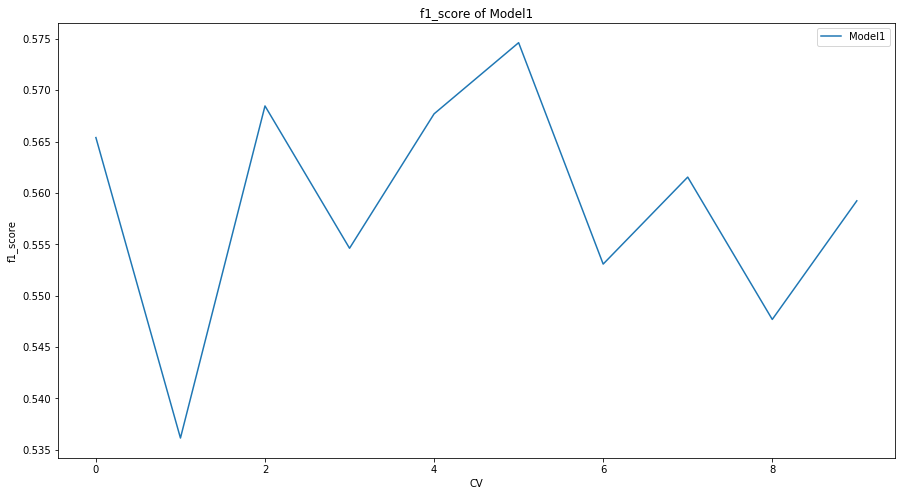

In [14]:
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter('ignore', DeprecationWarning)
%matplotlib inline 

model1_score = np.array(scores)
print('f1_score_model1: ', model1_score.mean(),'+-',1.96*model1_score.std())

plt.figure(figsize= (15,8))
plt.plot(model1_score, label='Model1')
plt.legend(loc='best')
plt.title('f1_score of Model1')
plt.xlabel('CV')
plt.ylabel('f1_score')
plt.show()

### 2.2 Comparison of Different Deep Network

Different number of layers may lead to different network performance. Cross categrorcal features could also lead to a difference. By investigating them we can get general idea about how Deep Network is affected by these factors.

Here we will use three models with different deep network architectures and compare their performance. Model1 is the wide and deep network we create before with cross columns of categorical features. Model2 and model3 are deep network without cross columns, but with different number of layers. We train and fit them on the same datasets obtained from StratifiedShuffleSplit and use f1_score as indicator to compare their performance. 

In [15]:
def create_deep_network(df_train, df_test, y_train, y_test, X_train_num, X_test_num):
    
    y_train_ohe = to_categorical(y_train)
    y_test_ohe = to_categorical(y_test)
    
    # we need to create separate sequential models for each embedding
    embed_branches = []
    X_ints_train = []
    X_ints_test = []
    all_inputs = []
    all_branch_outputs = []
    NUMCLASSES = y_train_ohe.shape[1]
    categorical_headers_ints = [x+'_int' for x in categorical_headers]
    # add in the embeddings
    for col in categorical_headers_ints:
        # encode as ints for the embedding
        X_ints_train.append( df_train[col].values )
        X_ints_test.append( df_test[col].values )
    
        # get the number of categories
        N = max(X_ints_train[-1]+1) # same as the max(df_train[col])
    
        # create embedding branch from the number of categories
        inputs = Input(shape=(1,),dtype='int32', name=col)
        all_inputs.append(inputs)
        x = Embedding(input_dim=N, output_dim=int(np.sqrt(N)), input_length=1)(inputs)
        x = Flatten()(x)
        all_branch_outputs.append(x)
    
    # also get a dense branch of the numeric features
    all_inputs.append(Input(shape=(X_train_num.shape[1],),sparse=False,name='numeric_data'))
    x = Dense(units=20, activation='relu')(all_inputs[-1])
    all_branch_outputs.append( x )

    # merge the branches together
    deep_branch = concatenate(all_branch_outputs)
    deep_branch = Dense(units=45,activation='relu')(deep_branch)
    deep_branch = Dense(units=40,activation='relu')(deep_branch)
    deep_branch = Dense(units=35,activation='relu')(deep_branch)
    deep_branch = Dense(units=30,activation='relu')(deep_branch)
    deep_branch = Dense(units=25,activation='relu')(deep_branch)
    deep_branch = Dense(units=20,activation='relu')(deep_branch)
    deep_branch = Dense(units=10,activation='relu')(deep_branch)
    
    # final_branch = concatenate(deep_branch)
    final_branch = Dense(units=NUMCLASSES,activation='relu')(deep_branch)

    model2 = Model(inputs=all_inputs, outputs=final_branch)

    model2.compile(optimizer='adagrad',
              loss='mean_squared_error',
              metrics=[f1_score])

    model2.fit(X_ints_train+[X_train_num],
        y_train_ohe, epochs=20, batch_size=32, verbose=0)
    
    yhat_ohe = np.round(model2.predict(X_ints_test + [X_test_num]))
    return f1(y_test,np.argmax(yhat_ohe,axis=1), average = 'micro'), yhat_ohe

In [16]:
scores2 = []
for train_index, test_index in cv_outerloop.split(X, y):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    
    df_train = pd.DataFrame(X_train, columns = df.columns)
    df_test = pd.DataFrame(X_test, columns = df.columns)
    
    X_train, X_test, y_train, y_test, X_train_num, X_test_num = data_process(df_train, df_test, 
                                                                             categorical_headers, numeric_headers)

    score, probas = create_deep_network(df_train, df_test, y_train, y_test, X_train_num, X_test_num)
    scores2.append(score)

In [23]:
def create_deep_network2(df_train, df_test, y_train, y_test, X_train_num, X_test_num):
    
    y_train_ohe = to_categorical(y_train)
    y_test_ohe = to_categorical(y_test)
    
    # we need to create separate sequential models for each embedding
    embed_branches = []
    X_ints_train = []
    X_ints_test = []
    all_inputs = []
    all_branch_outputs = []
    NUMCLASSES = y_train_ohe.shape[1]
    categorical_headers_ints = [x+'_int' for x in categorical_headers]
    # add in the embeddings
    for col in categorical_headers_ints:
        # encode as ints for the embedding
        X_ints_train.append( df_train[col].values )
        X_ints_test.append( df_test[col].values )
    
        # get the number of categories
        N = max(X_ints_train[-1]+1) # same as the max(df_train[col])
    
        # create embedding branch from the number of categories
        inputs = Input(shape=(1,),dtype='int32', name=col)
        all_inputs.append(inputs)
        x = Embedding(input_dim=N, output_dim=int(np.sqrt(N)), input_length=1)(inputs)
        x = Flatten()(x)
        all_branch_outputs.append(x)
    
    # also get a dense branch of the numeric features
    all_inputs.append(Input(shape=(X_train_num.shape[1],),sparse=False,name='numeric_data'))
    x = Dense(units=20, activation='relu')(all_inputs[-1])
    all_branch_outputs.append( x )

    # merge the branches together
    deep_branch = concatenate(all_branch_outputs)
    deep_branch = Dense(units=45,activation='relu')(deep_branch)
    deep_branch = Dense(units=35,activation='relu')(deep_branch)
    deep_branch = Dense(units=25,activation='relu')(deep_branch)
    deep_branch = Dense(units=10,activation='relu')(deep_branch)
    
    # final_branch = concatenate(deep_branch)
    final_branch = Dense(units=NUMCLASSES,activation='relu')(deep_branch)

    model2 = Model(inputs=all_inputs, outputs=final_branch)

    model2.compile(optimizer='adagrad',
              loss='mean_squared_error',
              metrics=[f1_score])

    model2.fit(X_ints_train+[X_train_num],
        y_train_ohe, epochs=20, batch_size=32, verbose=0)
    
    yhat_ohe = np.round(model2.predict(X_ints_test + [X_test_num]))
    return f1(y_test,np.argmax(yhat_ohe,axis=1), average = 'micro'), yhat_ohe

In [24]:
scores3 = []
for train_index, test_index in cv_outerloop.split(X, y):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    
    df_train = pd.DataFrame(X_train, columns = df.columns)
    df_test = pd.DataFrame(X_test, columns = df.columns)
    
    X_train, X_test, y_train, y_test, X_train_num, X_test_num = data_process(df_train, df_test, 
                                                                             categorical_headers, numeric_headers)

    score, probas = create_deep_network2(df_train, df_test, y_train, y_test, X_train_num, X_test_num)
    scores3.append(score)

f1_score_model2:  0.512 +- 0.196305012376
f1_score_model3:  0.564153846154 +- 0.0299435435642


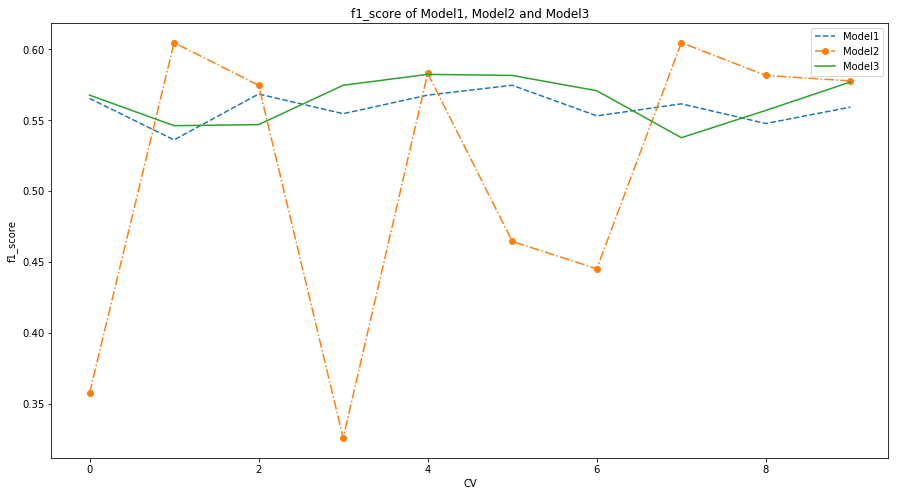

In [25]:
model2_score = np.array(scores2)
model3_score = np.array(scores3)
print('f1_score_model2: ', model2_score.mean(),'+-',1.96*model2_score.std())
print('f1_score_model3: ', model3_score.mean(),'+-',1.96*model3_score.std())

plt.figure(figsize= (15,8))
plt.plot(model1_score, label='Model1', linestyle = '--')
plt.plot(model2_score, label='Model2', linestyle='-.', marker='o')
plt.plot(model3_score, label='Model3')
plt.legend(loc='best')
plt.title('f1_score of Model1, Model2 and Model3')
plt.xlabel('CV')
plt.ylabel('f1_score')
plt.show()

In stratifiedshafflesplit process, we split our data ten times and get ten different cv splits. For each model we train it on different splits and then get f1_scores separately. In this way we can avoid data snooping.

From the plot above, we can find that they have best f1_score at aroud 0.57-0.61, which do not differ much. Model 1 and 3 show similiar pattern while model 2 is obviously more unstable than the others with several scores much lower than general results.

We take model 3 as our best model since it has the best mean best f1 score and is stable within all cv split data.

### 2.3 Comparison of Best Deep Network and MLP

In [26]:
from sklearn.neural_network import MLPClassifier

scores4 = []
for train_index, test_index in cv_outerloop.split(X, y):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    
    df_train = pd.DataFrame(X_train, columns = df.columns)
    df_test = pd.DataFrame(X_test, columns = df.columns)
    
    X_train, X_test, y_train, y_test, X_train_num, X_test_num = data_process(df_train, df_test, 
                                                                             categorical_headers, numeric_headers)

    clf = MLPClassifier(hidden_layer_sizes=(50, ), activation='relu', solver='adam', alpha=0.0001, 
              batch_size='auto', learning_rate='constant', learning_rate_init=0.001, 
              max_iter=100, shuffle=True, random_state=None, tol=0.0001, 
              verbose=False, warm_start=False, momentum=0.9, nesterovs_momentum=True, early_stopping=False, 
              beta_1=0.9, beta_2=0.999, epsilon=1e-08)

    clf.fit(X_train,y_train)
    clf.score(X_test,y_test)
    predictions = clf.predict(X_test)
    scores4.append(f1(y_test,predictions, average = 'micro'))

clf_score:  0.601923076923 +- 0.0177786268864


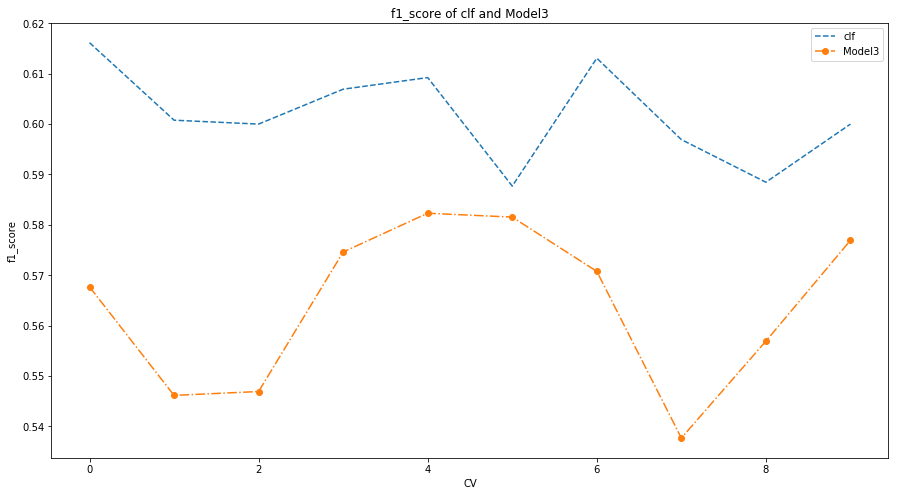

In [27]:
clf_score = np.array(scores4)
print('clf_score: ', clf_score.mean(),'+-',1.96*clf_score.std())

plt.figure(figsize= (15,8))
plt.plot(clf_score, label='clf', linestyle = '--')
plt.plot(model3_score, label='Model3', linestyle='-.', marker='o')
plt.legend(loc='best')
plt.title('f1_score of clf and Model3')
plt.xlabel('CV')
plt.ylabel('f1_score')
plt.show()

Here we compare the generalization performance of our best deep network mdoel to MLP model. As you can see, both of them are relative stable varying no more than 4% in different cv. For overall data, the MLP model have a mean f1_score 3.5% better than model 3. Our Deep Network model might be underfitting.

In [28]:
import sklearn
from sklearn.metrics import roc_curve, auc
from scipy import interp

def plot_ROC(classifier):
    mean_tpr = 0.0
    mean_fpr = np.linspace(0, 1, 100)
    all_tpr = []

    cv = 0
    for train_index, test_index in cv_outerloop.split(X, y):
        cv += 1
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index]
            
        df_train = pd.DataFrame(X_train, columns = df.columns)
        df_test = pd.DataFrame(X_test, columns = df.columns)
        
        X_train, X_test, y_train, y_test, X_train_num, X_test_num = data_process(df_train, df_test, 
                                                                                 categorical_headers, numeric_headers)
        
        probas = []
        if(classifier is 'clf'):
            clf = MLPClassifier(hidden_layer_sizes=(50, ), activation='relu', solver='adam', alpha=0.0001, 
              batch_size='auto', learning_rate='constant', learning_rate_init=0.001, 
              max_iter=100, shuffle=True, random_state=None, tol=0.0001, 
              verbose=False, warm_start=False, momentum=0.9, nesterovs_momentum=True, early_stopping=False, 
              beta_1=0.9, beta_2=0.999, epsilon=1e-08)
        
            clf.fit(X_train,y_train)
            clf.score(X_test,y_test)
            probas = clf.predict_proba(X_test)
        else:
            score, probas = create_deep_network2(df_train, df_test, y_train, y_test, X_train_num, X_test_num)
              
        perclass_mean_tpr = 0.0
        roc_auc = 0
        classes = np.unique(y_train)
        # get the mean fpr and tpr, per class
        for j in classes:
            fpr, tpr, thresholds = roc_curve(y_test,
                                         probas[:, j],
                                         pos_label=j)
            perclass_mean_tpr += interp(mean_fpr, fpr, tpr)
            perclass_mean_tpr[0] = 0.0
            roc_auc += auc(fpr, tpr)
        
        perclass_mean_tpr /= len(classes)
        roc_auc /= len(classes)
        mean_tpr += perclass_mean_tpr
        plt.plot(mean_fpr,perclass_mean_tpr,'--',lw=1,label='Mean Class ROC cv %d (area = %0.2f)'
                   % (cv, roc_auc))
    mean_tpr /= cv
    mean_auc = auc(mean_fpr, mean_tpr)
    plt.plot(mean_fpr,perclass_mean_tpr,'k-',lw=2,label='Total Mean ROC (area = %0.2f)'
                   % (mean_auc))
    plt.legend(loc='best')
    plt.grid()

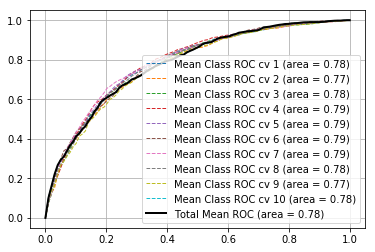

In [21]:
plot_ROC('clf')

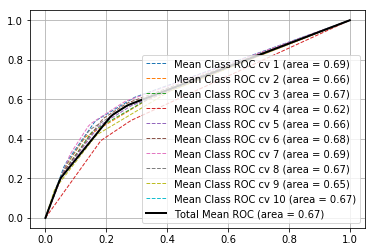

In [29]:
plot_ROC('model3')

From the plot, we can see that the MLP model has the curve comparatively closer to the upper-left corner overall. The MLP model has a better performance with mean AUC of 0.78 than that of model2, which is 0.67. This result is consistent with what we find from f1_score plot.

In Model3 ROC, we notice that the False positive rate is relative higher at the same True positive rate, leading the overall curve deviates from the upper-left corner and has smaller AUC. That is because the default shreshold we used to classfy positive and negative in model might be smaller than needed. Therefore, it will misclassify some more negative into positive predictions, thus reduce our f1_score.

<a id="ExceptionalWork"></a>
## 3. Exceptional Work

In [14]:
#Deploy our model3 here
from sklearn.metrics import classification_report,confusion_matrix

for train_index, test_index in cv_outerloop.split(X, y):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    
df_train = pd.DataFrame(X_train, columns = df.columns)
df_test = pd.DataFrame(X_test, columns = df.columns)

X_train, X_test, y_train, y_test, X_train_num, X_test_num = data_process(df_train, df_test, 
                                                                             categorical_headers, numeric_headers)
    

y_train_ohe = to_categorical(y_train)
y_test_ohe = to_categorical(y_test)
    
# we need to create separate sequential models for each embedding
embed_branches = []
X_ints_train = []
X_ints_test = []
all_inputs = []
all_branch_outputs = []
NUMCLASSES = y_train_ohe.shape[1]
categorical_headers_ints = [x+'_int' for x in categorical_headers]
# add in the embeddings
for col in categorical_headers_ints:
    # encode as ints for the embedding
    X_ints_train.append( df_train[col].values )
    X_ints_test.append( df_test[col].values )
    
    # get the number of categories
    N = max(X_ints_train[-1]+1) # same as the max(df_train[col])
    
    # create embedding branch from the number of categories
    inputs = Input(shape=(1,),dtype='int32', name=col)
    all_inputs.append(inputs)
    x = Embedding(input_dim=N, output_dim=int(np.sqrt(N)), input_length=1)(inputs)
    x = Flatten()(x)
    all_branch_outputs.append(x)
    
# also get a dense branch of the numeric features
all_inputs.append(Input(shape=(X_train_num.shape[1],),sparse=False,name='numeric_data'))
x = Dense(units=20, activation='relu')(all_inputs[-1])
all_branch_outputs.append( x )

# merge the branches together
deep_branch = concatenate(all_branch_outputs)
deep_branch = Dense(units=45,activation='relu')(deep_branch)
deep_branch = Dense(units=35,activation='relu')(deep_branch)
deep_branch = Dense(units=25,activation='relu')(deep_branch)
deep_branch = Dense(units=10,activation='relu')(deep_branch)
    
# final_branch = concatenate(deep_branch)
final_branch = Dense(units=NUMCLASSES,activation='relu')(deep_branch)

model_best = Model(inputs=all_inputs, outputs=final_branch)

model_best.compile(optimizer='adagrad',
              loss='mean_squared_error',
              metrics=[f1_score])

model_best.fit(X_ints_train+[X_train_num],
        y_train_ohe, epochs=20, batch_size=32, verbose=0)
    
yhat_ohe = np.round(model_best.predict(X_ints_test + [X_test_num]))
print(classification_report(y_test,np.argmax(yhat_ohe,axis=1)))
print(confusion_matrix(y_test,np.argmax(yhat_ohe,axis=1)))

             precision    recall  f1-score   support

          0       0.40      0.59      0.48       256
          1       0.65      0.70      0.68       477
          2       0.58      0.43      0.49       567

avg / total       0.57      0.56      0.56      1300

[[151  13  92]
 [ 59 334  84]
 [163 163 241]]


In [15]:
from keras import layers
import seaborn as sns
sns.set(style="darkgrid")

def plot_weights_layer(embed_name,model):
    layer = model.get_layer(embed_name)
    weight = layer.get_weights()[0]
    return weight

In [16]:
model_best.summary()

____________________________________________________________________________________________________
Layer (type)                     Output Shape          Param #     Connected to                     
alcohol_int (InputLayer)         (None, 1)             0                                            
____________________________________________________________________________________________________
wine_type_int (InputLayer)       (None, 1)             0                                            
____________________________________________________________________________________________________
cont_citric_int (InputLayer)     (None, 1)             0                                            
____________________________________________________________________________________________________
density_water_int (InputLayer)   (None, 1)             0                                            
___________________________________________________________________________________________

Here, we can see the four embedding layers wihch indicates to measure whether the degree of alcohol, the wine type, wether it contians cont_citric, and whether its density is greater or less than water. Next, we grasp the detailed embedding weights of them. 

In [17]:
weight_1 = plot_weights_layer('embedding_5',model_best)
combin_weight = []
weight_1_col1 = []
weight_1_col2 = []
for embed in weight_1:
    print(embed)
    weight_1_col1.append(abs(embed[0])*100)
    weight_1_col2.append(abs(embed[1])*100)
    # multiple 100 in order to get the porportion in the pie chart later
    combin_weight.append(100*np.sum(np.abs(embed)))

[ 0.20800284 -0.14754331]
[-0.22215238  0.13255724]
[-0.15726514  0.06740034]
[ 0.10607797  0.0251784 ]


Here, the embedding matrix transform the original four categories into two, which follows the matrix-vector product. Output (O) = Input (I) * embedding weights,
$$
O \in \mathbb{R^{4\times 1}} 
$$
$$
I \in \mathbb{R^{2\times 1}} 
$$
We set the output dimension to be the square root of the input feature numbers, that is $\sqrt{4} = 2$
$$
  \begin{matrix}\begin{pmatrix} \text{Low} &  
  \text{Med-Low} & 
  \text{Med-High} &
  \text{High}
  \end{pmatrix}\\\mbox{}\end{matrix} =
  \begin{pmatrix} -0.20703742 & 0.22353411 \\
  0.21779783 & -0.02634452 \\
  0.09239042 & -0.00748564 \\
  -0.05395687 & -0.04576383 \end{pmatrix} 
  \begin{pmatrix} \text{O1} \\ \text{O2} \end{pmatrix}
$$
We would like to investigate which category is relatively more important than other categories in the alcohol inclusion degree in the prediction. Let's do the pie chart!

In [23]:
encoders['wine_type_int'].inverse_transform([0,1])

KeyError: 'wine_type_int'

In [ ]:
import matplotlib.pyplot as plt

def plot_alc_weights(weight_column, title):
    # For the first categorical feature - alcohol_int
    labels = 'Low', 'Medium-Low', 'Medium', 'Medium-High'
    sizes = weight_column
    colors = ['gold', 'yellowgreen', 'lightcoral', 'lightskyblue']
    explode = (0.1, 0, 0, 0)  # explode 1st slice

    # Plot
    plt.pie(sizes, explode=explode, labels=labels, colors=colors,
            autopct='%1.1f%%', shadow=True, startangle=140)

    plt.axis('equal')
    plt.title(title)
    plt.show()

In [ ]:
plot_alc_weights(weight_1_col1,
                 'alcohol degree weights for the first embedded feature')


For the first output embedded feature, we can see the Low and Medium-Low categories are more critical than the Medium and Medium-High categories. As we see the data above, even if the Low and Medium-Low's weight is relatively bigger than the rest, their actual wieghts value are not greater than 0.5, which cannot make a dominant postion. It's possible that the wide architecture (corssed-features) does not make much different for the dataset.

In [ ]:
plot_alc_weights(weight_1_col2,
                 'alcohol degree weights for the second embedded feature')


For the second output embedded feature, we can see the Low becomes the most significant one. However, the same situation happens that the lagerest weight is still around 0.2 which leads a less influence.

In [ ]:
plot_alc_weights(combin_weight,
                 'alcohol degree sum weights for the embedding')


Sum up the absolute value of weights for output feature 1 and 2 render to the combine weight visualization above. The proportion follows our expectation as it represents both output features. Let's explore wether the wine type make things different then.

In [ ]:
weight_2 = plot_weights_layer('embedding_6',model_best)
for embed in weight_2:
    print(embed)
    # multiple 100 in order to get the porportion in the pie chart later
    embed *= 100 

The weights keep small but the first category in the wine type affect more than the second catgory. It's worth to see how the relatively of the two features.

In [ ]:
def plot_wine_weights(weight_column, title):
    # For the first categorical feature - alcohol_int
    labels = 'White', 'Red'
    sizes = weight_column
    colors = ['lightcoral', 'lightskyblue']
    explode = (0.1, 0)  # explode 1st slice

    # Plot
    plt.pie(sizes, explode=explode, labels=labels, colors=colors,
            autopct='%1.1f%%', shadow=True, startangle=140)

    plt.axis('equal')
    plt.title(title)
    plt.show()

In [ ]:
plot_wine_weights(weight_2, 'wine type weights for the embedding')

White wine seems to be more importat in the quality of the wine than red wine does. 

In [ ]:
weight_3 = plot_weights_layer('embedding_7',model_best)
for embed in weight_3:
    print(embed)


Both of the weights are quite small although the absolute value of the later is greater than the first one. It's not quite worthwhile to see the relatively proprotion in pie chart.

In [ ]:
weight_4 = plot_weights_layer('embedding_8',model_best)
for embed in weight_4:
    print(embed)

Same here.

<a id="References"></a>
## References

[1] http://www3.dsi.uminho.pt/pcortez/wine/

[2] http://projects.csail.mit.edu/wiki/pub/Evodesign/SensoryEvaluationsDatabase/winequality09.pdf

[3] https://www.kaggle.com/piyushgoyal443/red-wine-dataset

[4] https://www.google.com/url?sa=t&rct=j&q=&esrc=s&source=web&cd=8&cad=rja&uact=8&ved=0ahUKEwiAzoKjo4TWAhVR7mMKHYEfCqoQFghYMAc&url=http%3A%2F%2Fwww2.cs.uh.edu%2F~ceick%2FDM%2FProject1-12.docx&usg=AFQjCNEcDQx4uPCOsg_047yFcPWUskD9yA

[5] Paulo CortezJuliana TeixeiraAntónio CerdeiraFernando AlmeidaTelmo MatosJosé Reis. Modeling wine preferences by data mining from physicochemical properties. International Conference on Discovery Science. 2009 pp 66-79.

[6] S. Ebeler, Flavor Chemistry — Thirty Years of Progress, Kluwer Academic Publishers, 1999, pp. 409–422, chapter Linking flavour chemistry to sensory
analysis of wine.